<a href="https://colab.research.google.com/github/TheMonarch00/Traffic_Sign_Recognition_Using_CNN/blob/main/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
os.chdir('/content/drive/MyDrive/Traffic Sign Classification')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [8]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [9]:
cur_path

'/content/drive/MyDrive/Traffic Sign Classification'

In [10]:
for i in range(classes):
  path = os.path.join(cur_path,'Train',str(i))
  images = os.listdir(path)
  for a in images:
    try:
      image = Image.open(path + '/' + a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except Exception as e:
      print(e)

In [11]:
data = np.array(data)
labels = np.array(labels)

In [12]:
%mkdir training
np.save("./training/data.npy",data)
np.save("./training/labels.npy",labels)

mkdir: cannot create directory ‘training’: File exists


In [30]:
data = np.load("./training/data.npy")
labels = np.load("./training/labels.npy")

In [31]:
print(data.shape,labels.shape)

(39219, 30, 30, 3) (39219,)


In [32]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31375, 30, 30, 3) (7844, 30, 30, 3) (31375,) (7844,)


In [34]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [35]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(5,5), activation='relu',input_shape = x_train.shape[1:]))
model.add(Conv2D(filters = 32,kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters = 64,kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters = 64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [37]:
Sign = model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
981/981 [==============================] - 13s 12ms/step - loss: 2.2377 - accuracy: 0.3994 - val_loss: 0.9613 - val_accuracy: 0.7186
Epoch 2/30
981/981 [==============================] - 11s 11ms/step - loss: 0.9393 - accuracy: 0.7193 - val_loss: 0.2583 - val_accuracy: 0.9222
Epoch 3/30
981/981 [==============================] - 11s 11ms/step - loss: 0.4824 - accuracy: 0.8558 - val_loss: 0.2617 - val_accuracy: 0.9306
Epoch 4/30
981/981 [==============================] - 11s 11ms/step - loss: 0.3563 - accuracy: 0.8958 - val_loss: 0.0843 - val_accuracy: 0.9762
Epoch 5/30
981/981 [==============================] - 11s 11ms/step - loss: 0.2879 - accuracy: 0.9186 - val_loss: 0.1666 - val_accuracy: 0.9526
Epoch 6/30
981/981 [==============================] - 11s 11ms/step - loss: 0.2687 - accuracy: 0.9249 - val_loss: 0.0783 - val_accuracy: 0.9802
Epoch 7/30
981/981 [==============================] - 11s 11ms/step - loss: 0.2524 - accuracy: 0.9296 - val_loss: 0.0813 - val_accuracy:

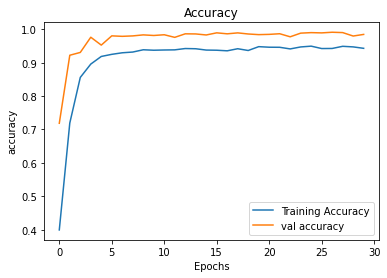

In [38]:
plt.figure(0)
plt.plot(Sign.history['accuracy'],label = "Training Accuracy")
plt.plot(Sign.history['val_accuracy'],label = "val accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

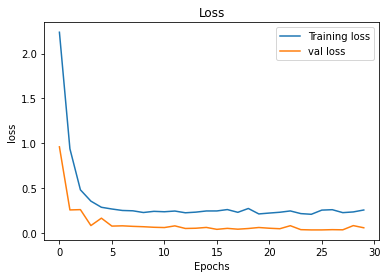

In [39]:
plt.plot(Sign.history['loss'],label = "Training loss")
plt.plot(Sign.history['val_loss'],label = "val loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [40]:
def testing(testcsv):
  y_test = pd.read_csv(testcsv)
  label = y_test['ClassId'].values
  imgs = y_test['Path'].values
  data = []
  for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
  x_test = np.array(data)
  return x_test,label

In [41]:
model.save('./training/TSR.h5')

In [42]:
x_test,label = testing('Test.csv')

In [43]:
model = load_model('./training/TSR.h5')

In [44]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred

array([16,  1, 38, ..., 32,  7, 10])

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,y_pred))

0.9541567695961995


In [46]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }


In [47]:
def TestOnImg(img):
  data = []
  image = Image.open(img)
  image = image.resize((30,30))
  data.append(np.array(image))
  x_test = np.array(data)
  y_pred = np.argmax(model.predict(x_test), axis=-1)
  return image,y_pred

predicted traffic sign is: Turn left ahead


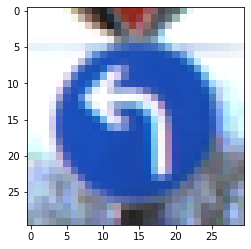

In [48]:
plot,prediction = TestOnImg('Test/00032.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("predicted traffic sign is:", classes[a])
plt.imshow(plot)
plt.show()